# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

[In this notebook you're provided with hints and brief instructions and thinking prompts. Don't ignore them as they are designed to equip you with the structure for the project and will help you analyze what you're doing on a deeper level. Before submitting your project, make sure you remove all hints and descriptions provided to you. Instead, make this report look as if you're sending it to your teammates to demonstrate your findings - they shouldn't know you had some external help from us! To help you out, we've placed the hints you should remove in square brackets.]

[Before you dive into analyzing your data, explain the purposes of the project and hypotheses you're going to test.]

## Open the data file and have a look at the general information. 



In [1]:
# Loading all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer



###### Loading the data

In [2]:

pd.set_option('display.max_columns', None)

# Load the data
df = pd.read_csv('credit_scoring_eng.csv')

df.head() # checking to ensure it loaded in correctly 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

Now let's explore our data. We want to see how many columns and rows it has, look at a few rows to check for potential issues with the data.

In [3]:
# Let's see how many rows and columns our dataset has
df.shape
# df.info() # more informative than just the shape itself 

(21525, 12)

In [4]:
# let's print the first N rows
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [5]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [6]:
df['education_id'].unique()

array([0, 1, 2, 3, 4])

In [7]:
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [8]:
df['debt'].unique()

array([0, 1])

In [9]:
df['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

In [10]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

###### Comments: 

1. days_employed : negatives? needs investigation , too big of values? 
2. There are surely null values that I can't see in the first 10 columns
3. education: capital letters in some rows; this could be an issue in other columns 
4. There could be other issues that aren't apparent as of first look at the 10 columns.
5. What is XNA in gender column? 
6. Debt seems to be a binary variable, they either have it or they dont. It's not the amount of debt. (nothing wrong with that)
7. maybe change the column name of dob_years to age. Age has values of 0
8. -1 children? 20 children? replace with 1 and 2 respectively. 

In [11]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [12]:
df.isna().sum()
# 2174 missing values for both columns to be exact. 

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Are there missing values across all columns or just a few?   
1. days_employed : 19351 out of 21525 values (many missing)
2. total_income : 19351 out of 21525 (many missing)

In [13]:
# Let's look at the filtered table with missing values in the the first column with missing data
miss_data=df['days_employed'].value_counts(dropna=False)
miss_data

 NaN            2174
-1645.463049       1
-6620.396473       1
-1238.560080       1
-3047.519891       1
                ... 
-2849.351119       1
-5619.328204       1
-448.829898        1
-1687.038672       1
-206.107342        1
Name: days_employed, Length: 19352, dtype: int64

The missing values are of the exact same size.
There is still the problem of negative values? We may just need to remove the negatives (typo issue?) or maybe they used dashes to signify a new value and it was imported this way.


In [14]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
(df.isna().sum()/len(df) * 100)

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

**Intermediate conclusion**

We can remove or impute the 10% of the missing values in the total_income column.
~ 10% of the rows have missing values. We could drop these rows, but these value may be related : i.e. 0 days of employment = 0 income otherwise known as unemployed? student? 
We'll check the corresponding missing value rows and see if there are any patterns. 

In [15]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values
df[df['days_employed'].isna()]
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [16]:
df[df['total_income'].isna() & df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


I see that the second table is equivalant to the first table. Meaning, the null values are on the exact samerows for both columns. Income types seem to vary for those missing values, so I am not sure what could be causing these missing values

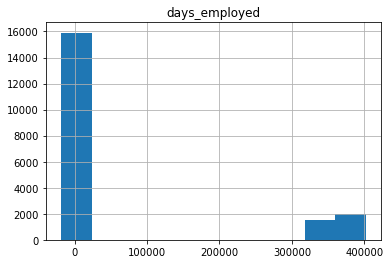

In [17]:
# Checking distribution
df.hist(column = 'days_employed')
plt.show()

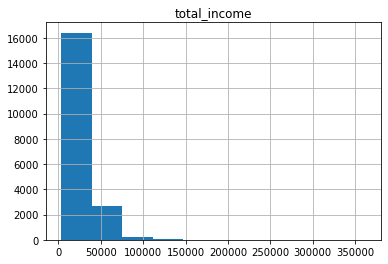

In [18]:
df.hist(column = 'total_income')
plt.show()

In [19]:
# renaming column
df = df.rename(columns={'dob_years': 'age'})

# #replace Nan to 0
df['days_employed'] = df['days_employed'].fillna(value = 0)



**Possible reasons for missing values in data**
2174 records are missing information in columns [‘days_employed’, ’total_income’].  I did not find a pattern according to which these values could have been missed deliberately. Different ages, different work status, different everything. Most of them  have no debt. We can either drop these columns or use mean to replace the missing income, and leavethe 'days_employed' column unchanged since it won't be used in the analysis.


## Data transformation


In [20]:
# Let's see all values in education column to check if and what spellings will need to be fixed
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [21]:
# Fix the registers if required
# Removing duplicate records in column 'education'
df['education'] = df['education'].str.lower() 

In [22]:
# Checking all the values in the column to make sure we fixed them

df['education'].value_counts()
# Looks good 

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

Check the data the `children` column

In [23]:
# Let's see the distribution of values in the `children` column
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [24]:
# [fix the data based on your decision]

# column 'children' replace '20' ==> '2', '-1' ==> '1'
df['children'] = df['children'].replace(20, 2)
df['children'] = df['children'].replace(-1, 1)


In [25]:
# Checking the `children` column again to make sure it's all fixed

df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [26]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
df['days_employed'][df['days_employed'] < 0].count()
percentage = 15906/len(df['days_employed'])
percentage*100

73.89547038327527

In [27]:
df['days_employed'] = df['days_employed'].abs()

In [28]:
# Check the result - make sure it's fixed
df['days_employed'][df['days_employed'] < 0 ].count()

0

In [29]:
# Check the `dob_years` for suspicious values and count the percentage
df['age'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: age, dtype: int64

In [30]:
# Address the issues in the `dob_years` column, if they exist

# column 'age' median
average_age = df['age'].loc[(df['age'] > 0)].median()
# column 'age' replace '0' ==> median
df['age'] = df['age'].replace(0, average_age)

In [31]:
# Check the result - make sure it's fixed
df['age'].value_counts()

35    617
43    614
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: age, dtype: int64

[Now let's check the `family_status` column. See what kind of values there are and what problems you may need to address.]

In [32]:
# Let's see the values for the column
df['family_status'].value_counts()


married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

 Maybe remove the space in the widow / widower ? or change it to "widow" replace the space in civil partnership with _ I don't think these are necessary adjustments so far in the course

Now let's check the `gender` column. See what kind of values there are and what problems you may need to address

In [33]:
# Let's see the values in the column
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [34]:
# Address the problematic values, if they exist
df = df.drop(df[df.gender == 'XNA'].index)

# it's just 1 row so it's ok to drop it completely as we don't know what XNA is

In [35]:
# Check the result - make sure it's fixed
df['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

In [36]:
df.shape

(21524, 12)

Now let's check the `income_type` column. See what kind of values there are and what problems you may need to address

In [37]:
# Let's see the values in the column
df['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [38]:
# Address the problematic values, if they exist
# We could combine the last4 values into "other" or drop them but leaving them there doesn't hurt
# Entrepenour may be same as business so I'll combine them
df['income_type'] = df['income_type'].replace('entrepreneur', 'business')

In [39]:
# Check the result - make sure it's fixed
df['income_type'].value_counts()

employee                       11119
business                        5086
retiree                         3856
civil servant                   1459
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

[Now let's see if we have any duplicates in our data. If we do, you'll need to decide what you will do with them and explain why.]

In [40]:
# Checking duplicates
df[df.duplicated()]
# 71 of them

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,0.0,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,0.0,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,0.0,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,0.0,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,0.0,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,0.0,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,0.0,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,0.0,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,0.0,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [41]:
# Let's drop the duplicates

In [42]:
# Address the duplicates, if they exist
df = df.drop_duplicates().reset_index(drop = True)

In [43]:
# Last check whether we have any duplicates
df.duplicated().sum()

0

In [44]:
# Check the size of the dataset that you now have after your first manipulations with it
df.shape

(21453, 12)


We dealt with all the anomalies and duplicates. We've dropped a total of 72 rows based on the duplicates and 1 from the gender column. 21453/21525  - 1  = 0.33 % of the data has been removed. 

# Working with missing values

[To speed up working with some data, you may want to work with dictionaries for some values, where IDs are provided. Explain why and which dictionaries you will work with.]

Education and education_id have matching values 
Family_status and family_status_id also have representative values
I'll create the dictionary, but since there is only 2 key value pairs, I don't think I'll use it. 

In [45]:
# Find the dictionaries
df_dictionary = pd.DataFrame({'eduction': ["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], 'education_id': [0, 1, 2, 3, 4], 'family_status': ['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], 'family_status_id': [0, 1, 2, 3, 4]})

In [46]:
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


### Restoring missing values in `total_income`

In [47]:
# Let's write a function that calculates the age category
def age_group(age):
    """
    The function returns the age group according to the age value, using the following rules:
    —'children' for age <= 18
    —'adult' for 19 <= age <= 64
    —'retired' for all other cases
    """
    
    if age <= 18:
        return 'children'
    if age <= 64:
        return 'adult'
    return 'retired' 
    

In [48]:
# Test if the function works
age_group(6)

'children'

In [49]:
# Creating new column based on function
df['age_group'] = df['age'].apply(age_group)


In [50]:
# Checking how values in the new column
df[['age', 'age_group']]

,age,age_group
0,42,adult
1,36,adult
2,33,adult
3,32,adult
4,53,adult
...,...,...
21448,43,adult
21449,67,retired
21450,38,adult
21451,38,adult


In [51]:
# Look at the mean values for income based on your identified factors
df['total_income'].describe()

count     19350.000000
mean      26787.266688
std       16475.822926
min        3306.762000
25%       16486.515250
50%       23201.873500
75%       32547.910750
max      362496.645000
Name: total_income, dtype: float64

In [52]:
# Look at the median values for income based on your identified factors
df['total_income'].median()

23201.8735

In [53]:
df['days_employed'].describe()

count     21453.000000
mean      60358.204469
std      133533.960625
min           0.000000
25%         622.426583
50%        1821.341911
75%        4797.549936
max      401755.400475
Name: days_employed, dtype: float64

In [54]:
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult



Education has something to do with income. But I am only concerned about the distribution of my income, I am not trying to extrapolate the missing values based on my data, I am trying to fill them with the appropriate approximation (mean/median).
Since the max is far away from the mean/median (which are approximately the same), I will use median as there are outlier incomes.

In [55]:
#  Write a function that we will use for filling in missing values
# Creating a function makes this process more complicated than it needs to be

#column 'total_income' median
median_total_income = df['total_income'].median() # outliers are prevelant in income so median
#replace Nan to 'average_total_income'
df['total_income'] = df['total_income'].fillna(value = median_total_income)        

In [56]:
# Check if it works
df['total_income'].isna().sum()

0

In [57]:
# Checking the number of entries in the columns
df['total_income'].shape


(21453,)

###  Restoring values in `days_employed`

In [58]:
# Distribution of `days_employed` medians based on your identified parameters

df['days_employed'].median()

1821.341911016643

In [59]:
# Distribution of `days_employed` means based on your identified parameters
df['days_employed'].mean()

60358.204469091004

I will use median because we can see how the mean is dragged up based on outliers. 

In [60]:
# Replacing missing values
median_days_employed = df['days_employed'].median() # outliers are prevelant in income so median
#replace Nan to 'average_total_income'
df['days_employed'] = df['days_employed'].fillna(value = median_days_employed) 

In [61]:
df['days_employed'].isna().sum()

0

In [62]:
# Check the entries in all columns - make sure we fixed all missing values
df.isna().sum()

children            0
days_employed       0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [63]:
# converting from float to int for memory usage
df['days_employed'] = df['days_employed'].astype(int, errors='ignore')
df['total_income'] = df['total_income'].astype(int, errors='ignore')

## Categorization of data


In [64]:
# Creating function for categorizing into different numerical groups based on ranges

df['total_income'].describe()

count     21453.000000
mean      26435.262900
std       15683.699668
min        3306.000000
25%       17219.000000
50%       23201.000000
75%       31327.000000
max      362496.000000
Name: total_income, dtype: float64

In [65]:
# MY categorization 
# The chosen ranges for income are based on the standard deviation
# I choose numbers are my return in order to optimize this for future machine learnine model

def category_total_income(total_income):
    if total_income < 75000:
        return 0
    elif 75000 <= total_income < 120000:
        return 1
    elif 120000 <= total_income < 150000:
        return 2
    elif 150000 <= total_income < 200000:
        return 3
    else:
        return 4
    
def category_children(children):
    if children < 1:
        return 0
    elif 1 <= children < 3:
        return 1
    else:
        return 2

def category_age(age):
    if age < 35:
        return 0
    elif 35 <= age < 45:
        return 1
    else:
        return 2
    
df['children_category'] = df['children'].apply(category_children)
df['total_income_category'] = df['total_income'].apply(category_total_income)
df['dob_years_category'] = df['age'].apply(category_age)

In [66]:
# Removing duplicate records in column 'purpose'
df['purpose'].value_counts().count() # there are 38 different types of purpose

38

In [67]:
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english')

def type_of_purpose(purpose):
    for word in purpose.split(' '):
        if 'car' == english_stemmer.stem(word):
           return 'buying a car'
        if 'wed' == english_stemmer.stem(word):      
           return 'wedding ceremony'
        if ('educ' == english_stemmer.stem(word) or 'univers' == english_stemmer.stem(word)):   
           return 'going to university'
        if ('hous' == english_stemmer.stem(word) or 'properti' == english_stemmer.stem(word) or 'estat' == english_stemmer.stem(word)):
           return 'real estate transactions'
    
    return purpose

df['purpose'] = df['purpose'].apply(type_of_purpose)
df['purpose'].value_counts()

real estate transactions    10810
buying a car                 4306
going to university          4013
wedding ceremony             2324
Name: purpose, dtype: int64

In [68]:
df.head()
# Check added columns

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,children_category,total_income_category,dob_years_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,real estate transactions,adult,1,0,1
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,buying a car,adult,1,0,1
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,real estate transactions,adult,0,0,0
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,going to university,adult,2,0,0
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,wedding ceremony,adult,0,0,2


## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [69]:
# Check the children data and paying back on time
df['has_children'] = df['children'].apply(lambda x: int(x>0))
df_children = df[df['debt']==0].groupby(['children','debt']).size().reset_index().merge(df[df['debt']==1].groupby(['children','debt']).size().reset_index(), on='children')
df_children["rate"] = 100*df_children["0_y"]/df_children["0_x"]
df_children

# Calculating default-rate based on the number of children


,children,debt_x,0_x,debt_y,0_y,rate
0,0,0,13027,1,1063,8.159975
1,1,0,4410,1,445,10.090703
2,2,0,1926,1,202,10.488058
3,3,0,303,1,27,8.910891
4,4,0,37,1,4,10.810811


In [70]:
df_children = df[df['debt']==0].groupby(['children_category','debt']).size().reset_index().merge(df[df['debt']==1].groupby(['children_category','debt']).size().reset_index(), on='children_category')
df_children["rate"] = 100*df_children["0_y"]/df_children["0_x"]
df_children

,children_category,debt_x,0_x,debt_y,0_y,rate
0,0,0,13027,1,1063,8.159975
1,1,0,6336,1,647,10.211490
2,2,0,349,1,31,8.882521


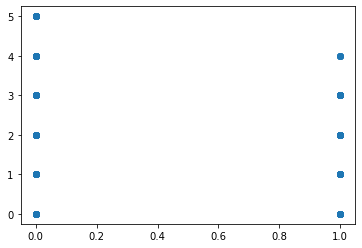

In [71]:
plt.scatter(df['debt'], df['children'])
plt.show()

In [72]:
df[['children_category', 'debt']].corr(method='spearman')
df[['children', 'debt']].corr(method='spearman')

,children,debt
children,1.000000,0.028421
debt,0.028421,1.000000


Little correlation but there might be some "unlinear " relationship here. But it's hard to say, I'd say no relationship or very little


**Conclusion**


As we could see, there is a difference between borrowers that having kids and repaying a loan on time, 
but I am not sure if these differences are significant as I am no expert in loans and rates and whatnot.  


**Is there a correlation between family status and paying back on time?**

In [73]:
# Check the family status data and paying back on time

df_family = df[df['debt']==0].groupby(['family_status_id','debt']).size().reset_index().merge(df[df['debt']==1].groupby(['family_status_id','debt']).size().reset_index(), on='family_status_id')
df_family["rate"] = 100*df_family["0_y"]/df_family["0_x"]

df_family


# Calculating default-rate based on family status



,family_status_id,debt_x,0_x,debt_y,0_y,rate
0,0,0,11408,1,931,8.160940
1,1,0,3762,1,388,10.313663
2,2,0,896,1,63,7.031250
3,3,0,1110,1,85,7.657658
4,4,0,2536,1,274,10.804416


In [74]:
df[['family_status_id', 'debt']].corr(method='spearman')

,family_status_id,debt
family_status_id,1.000000,0.023348
debt,0.023348,1.000000


**Conclusion**


We have the same picture as before. There are some changes on the rate, but it's hard to say whether that's because there is a relationship, or by chance. As far as correlation goes, we can say there is almost none. There is weak relation, it looks like widow / widower and divorced groups have good figures. 

**Is there a correlation between income level and paying back on time?**

In [75]:
# Check the income level data and paying back on time
map_total_income = {0:'<75000', 1:'[75000, 120000)',2:'[120000, 150000)',3:'[150000,200000)',4:'>=200000'}
df_income = df[df['debt']==0].groupby(['total_income_category','debt']).size().reset_index().merge(df[df['debt']==1].groupby(['total_income_category','debt']).size().reset_index(), on='total_income_category')
df_income["rate"] = 100*df_income["0_y"]/df_income["0_x"]
df_income["total_income_title"] = df_income["total_income_category"].map(map_total_income)
df_income
# Calculating default-rate based on income level



,total_income_category,debt_x,0_x,debt_y,0_y,rate,total_income_title
0,0,0,19440,1,1725,8.873457,<75000
1,1,0,227,1,12,5.286344,"[75000, 120000)"
2,2,0,19,1,2,10.526316,"[120000, 150000)"
3,3,0,16,1,1,6.250000,"[150000,200000)"
4,4,0,10,1,1,10.000000,>=200000


In [76]:
df[['total_income_category', 'debt']].corr(method='spearman')

,total_income_category,debt
total_income_category,1.00000,-0.01091
debt,-0.01091,1.00000


**Conclusion**

There is a very weak negative correlation between income level and paying back on time.
Also we see, clients with <75000 and >=200000 total income have best pay backs. 


**How does credit purpose affect the default rate?**

In [77]:
# Check the percentages for default rate for each credit purpose and analyze them
# create dictionary debt_dict
debt_dict = df[['debt']]
debt_dict = debt_dict.drop_duplicates().reset_index(drop=True)

def is_debt(debt):
    if debt == 0 :
        return 'no debt'
    return 'there is a debt'

# adding the string field 'is_debt'
debt_dict['is_debt'] = debt_dict['debt'].apply(is_debt)
debt_dict['is_debt'].value_counts()
debt_dict

#a purposes_debt table is created from customers and debt_dict.
purposes_debt = df[['purpose','debt','age']]
purposes_debt = debt_dict.merge(purposes_debt, on='debt', how='right')
purposes_debt

#pivot table is creating for analysis
pd_pivot = purposes_debt.pivot_table(index='purpose', columns='is_debt', values='age', aggfunc='count')
pd_pivot['ratio'] = pd_pivot.loc[:,'there is a debt']/( pd_pivot.loc[:,'no debt'] + pd_pivot.loc[:,'there is a debt'])
pd_pivot.sort_values(by='ratio', ascending = True)

is_debt,no debt,there is a debt,ratio
purpose,,,
real estate transactions,10028,782,0.072340
wedding ceremony,2138,186,0.080034
going to university,3643,370,0.092200
buying a car,3903,403,0.093590


**Conclusion**


After analyzing the data, we can say that the real estate purposes have slightly lower rates whereas the "car" and "university" have a higher rate. 

# General Conclusion 



It's important to analyze data and find out some dependencies and correlations for building a highly accurate predictive algorithm that could predict the creditworthiness of the clients. 
There have been differences based on categories, but I cannot say that these are necessarily statistically significant. There is a weak correlation between having children, also purposes of loans could impact the picture of the credit score in general speaking. It can be assumed that there is correlation between multiple features at the same time, multicollinearity issue?. Also we could describe an ideal client, - without kids, with total income more than 200000, and with purposes on loan to be real estate. 

Generally speaking, whether a client will be able to pay back on time should be evaluated on individual bases, treat these weak relationships as a guideline, not a hard solid rule. 
